In [5]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, r2_score
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
coracao = pd.read_csv('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Período 1/Coração/heart.csv')
o2 = pd.read_csv('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Período 1/Coração/o2Saturation.csv')

In [7]:
print(coracao.shape)
print(o2.shape)

(303, 14)
(3585, 1)


In [8]:
coracao.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
o2.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [10]:
coracao.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
coracao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
o2.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


In [13]:
o2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


1    165
0    138
Name: output, dtype: int64


Text(0, 0.5, 'Numero de Ocorrencias')

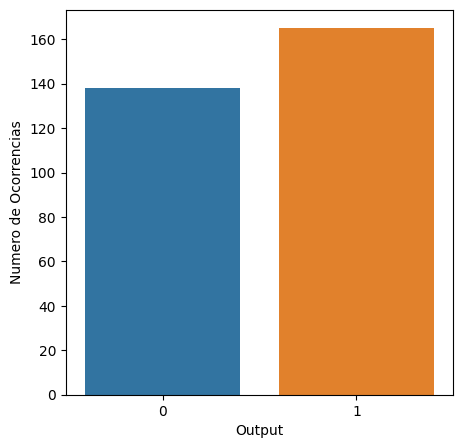

In [14]:
print(coracao['output'].value_counts())
plt.figure(figsize = (5, 5))
sns.countplot(x = coracao['output'])
plt.xlabel("Output")
plt.ylabel("Numero de Ocorrencias")


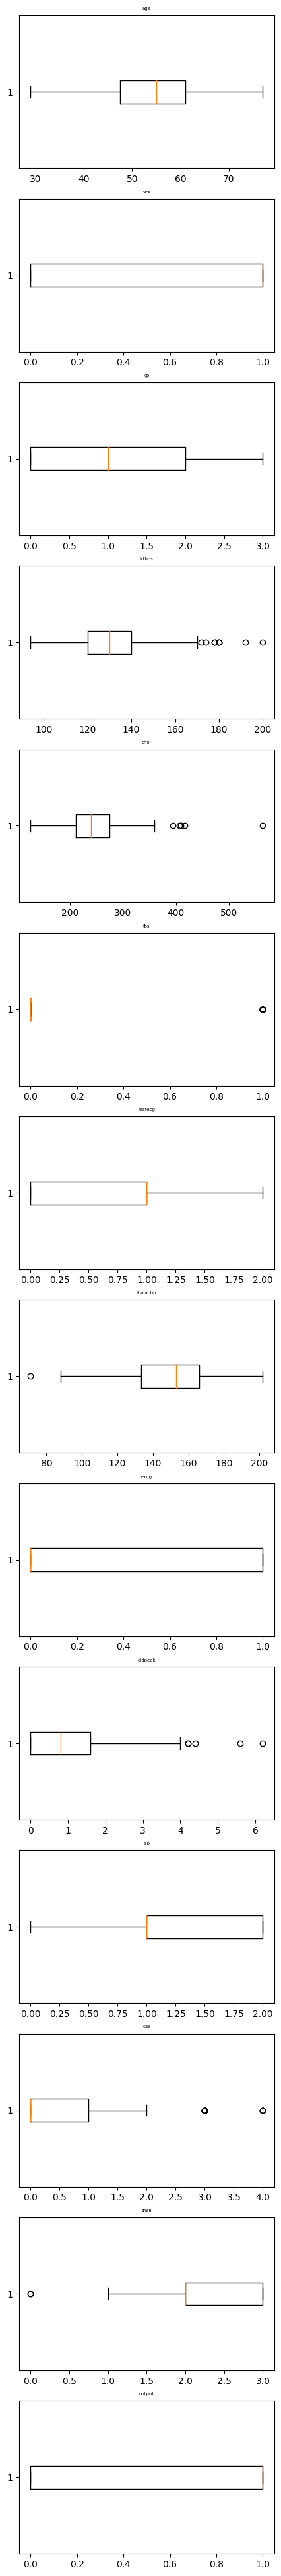

In [15]:
col = coracao.columns
fgi, ax = plt.subplots(len(coracao.columns),1 , figsize = (5,50))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(coracao[col[ind]], vert = False)
    axi.set_title(col[ind], size = 5)

<Axes: >

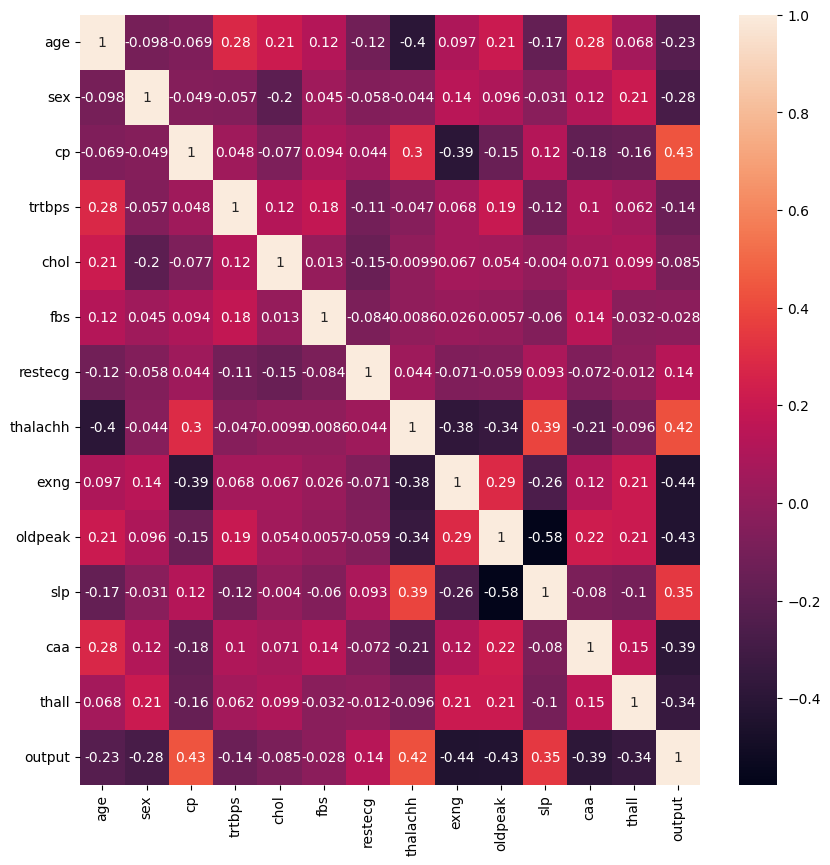

In [16]:
correl = coracao.corr()
plt.figure(figsize =  (10,10))
sns.heatmap(correl, annot = True)

In [17]:
print(correl['output'].sort_values(ascending = False))

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


In [18]:
coracao = coracao.drop(columns = ['chol','fbs'])

In [19]:
x = coracao.iloc[:,:-1]
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
y = coracao.loc[:,'output']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [20]:
logis = LogisticRegression()
logis.fit(xtrain, ytrain)
pred_logis = logis.predict(xtest)
print("Acurácia da regressão logística é: {} %".format(accuracy_score(pred_logis, ytest)*100))

Acurácia da regressão logística é: 82.41758241758241 %


In [36]:
linear = LinearRegression()
linear.fit(xtrain, ytrain)
pred_linear = linear.predict(xtest)
for i in range(len(pred_linear)):
  if pred_linear[i] > 0.4:
    pred_linear[i] = 1
  else:
    pred_linear[i] =0
print("Acurácia da regressão linear é: {} %".format(accuracy_score(pred_linear, ytest)*100))

Acurácia da regressão linear é: 82.41758241758241 %
